# Imported the Packages 

In [210]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris Dataset from sklearn.dataset

In [211]:
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


# Extract dataset into two features(Sepal Length and Sepal Width) and two Classes (Virginica and Non Virginica)

In [212]:
X = df.iloc[0:150, [1, 2]].values
y = df.iloc[0:150, 5].values
# set output lable value to 1 if it is Virginca and 0 if Other.
y = np.where(y == 'virginica', 1, 0)

# Normalize the data using Min Max Scaler

In [213]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# Split into Training and Testing

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.2)

In [215]:
#y_train.shape

# Define Sigmoid function for binary classsification

In [216]:
def sigmoid(X, theta):
    z = np.dot(X, theta[1:]) + theta[0] 
    return 1.0 / ( 1.0 + np.exp(-z))

# Loss function using Cross entropy formula

In [217]:
def lrCostFunction(y, hx):
  
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    
    return j

# Error Function

In [218]:
def error(X_std,theta,y): 
        hx = sigmoid(X_std,theta)
        c = lrCostFunction(y, hx)
        e = hx - y
        return e, c

# Implement Stoichastic Gradient Descent

In [219]:
def lrGradient(X_std, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    
    for i in range(num_iter):
        e,c = error(X_std,theta,y)
        grad = X_std.T.dot(e)
        theta[0] = theta[0] - alpha * e.sum()
        theta[1:] = theta[1:] - alpha * grad
        
        cost.append(c)
        
    return cost,theta

# Train the model by setting the learning rate = 0.01 and number of Iteration as 5000

In [220]:
theta = np.zeros(3)

alpha = 0.01
num_iter = 5000

cost,theta = lrGradient(X_train,y_train, theta, alpha, num_iter)

# Plot Loss Curve

Text(0.5, 1.0, 'Logistic Regression')

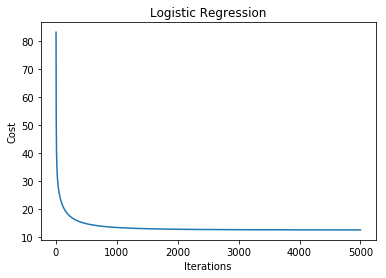

In [221]:
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

# Bias after Training

In [222]:
print ('\n Logisitc Regression bias(intercept) term :', theta[0])
print ('\n Logisitc Regression estimated coefficients :', theta[1:])


 Logisitc Regression bias(intercept) term : -9.985194411888441

 Logisitc Regression estimated coefficients : [-1.05960074 14.76213477]


# Predicting the Class of the flower using Test_data

In [223]:
def lrPredict(X_std,theta):
    
    return np.where(sigmoid(X_std,theta) >= 0.5,1, 0)

# Plotting trained Classifier on Test and Train Data

In [224]:
from matplotlib.colors import ListedColormap

def plot_decision_boundry(test_x,test_y,X_std,theta, y, classifier, h=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # decision surface
    x1_min, x1_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
    x2_min, x2_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T,theta)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(test_y)):
        plt.scatter(x=test_x[test_y == cl, 0], y=test_x[test_y == cl, 1],
                    alpha=0.9, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


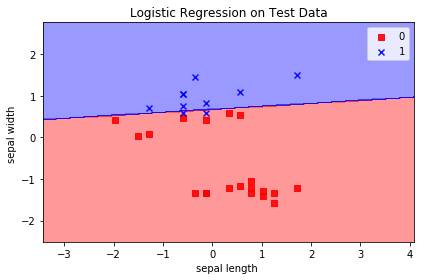

In [225]:
plot_decision_boundry(X_test,y_test,X_train,theta, y_train, classifier=lrPredict)
plt.title('Logistic Regression on Test Data')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper right')
plt.tight_layout()

# Accuracy of the Model

In [226]:
def accuracy(X_std,theta,y):
    correct = 0
    m = len(X_std)
    pred = lrPredict(X_std,theta)
    for i in range(m):
        if y[i] == pred[i]:
            correct += 1
    print(f"Accuracy:{correct/len(y)}")

In [227]:
accuracy(X_test,theta,y_test)

Accuracy:0.9333333333333333
